# 데이터셋 종류
- 추천알고리즘 성능비교를 위한 데이터셋
  1. MovieLens
  2. KMRD
  3. Netflix

- netflix 데이터 크기가 google colab 환경에서 진행하기에 적합하지 않기 때문에 `Part 4의 Chapter 01 딥러닝과 추천알고리즘` 은 kmrd 데이터셋 위주로 수업과 실습을 진행합니다. netflix 데이터 다운로드와 load하는 방법은 수업 영상과 아래 코드를 참고하시기 바랍니다.

In [ ]:
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_path = "/content/drive/My Drive/data/"

## MovieLens
  - 미네소타 대학에서 개발된 영화 평점 데이터셋으로 추천 알고리즘 성능 평가를 위해 일반적으로 많이 사용된다
  - [imdb 영화 사이트](https://www.imdb.com)를 참고하는 경우도 있다
  - [데이터셋 다운로드 링크](https://grouplens.org/datasets/movielens/)
  - `ml-latest`, `ml-25m`, `ml-1m`, `ml-10m` 등 데이터셋 크기에 따라 종류가 다양하다
  - `ml-latest-small` 을 데이터셋으로 사용한다

In [ ]:
path = data_path + "movielens"
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [ ]:
def get_simple_df_info(df):
  print("dataframe 사이즈: ", df.shape)
  print("\n")
  print("dataframe 정보")
  print(df.info())
  print("\n")
  print("dataframe 간단 통계량")
  print(df.describe())
  print("\n")
  print("dataframe의 몇몇 데이터 샘플")
  print(df.head())

In [ ]:
get_simple_df_info(df=tags_df)

- 이전에 분석한 MovieLens 강의자료 참고

- 강의 자료 참고 github [링크](https://github.com/jaewonlee-728/fastcampus-RecSys/tree/master/01-Recommender-System-101)
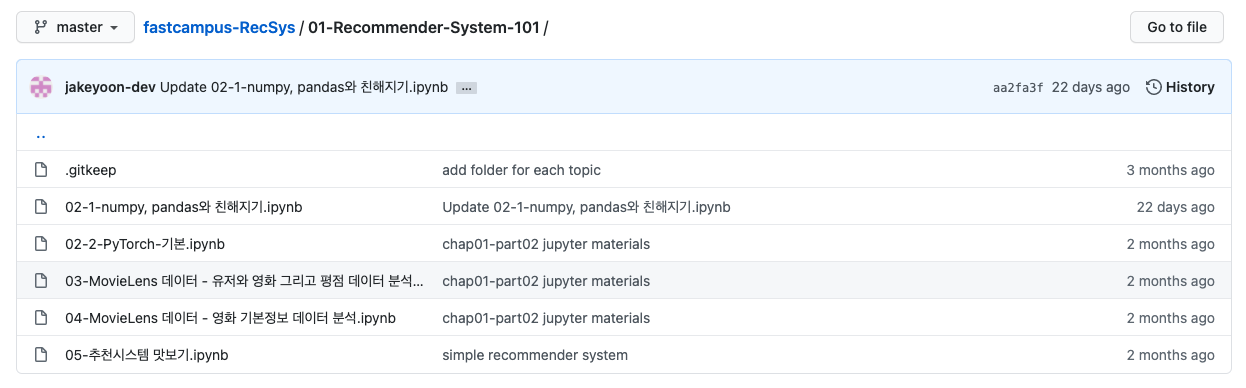


## KMRD
  - Korean Movie Recommender system Dataset
  - MovieLens 스타일로 네이버 영화 평점 사이트를 바탕으로 제작된 한국 데이터셋이다
  - [데이터셋 다운로드 링크](https://github.com/lovit/kmrd)

In [ ]:
path = data_path + "kmrd"
%cd $path

if not os.path.exists(path):
  !git clone https://github.com/lovit/kmrd
  !python setup.py install
else:
  print("data and path already exists!")

- 데이터셋 종류
  - 'small', '2m', '5m'
  - delimiter = '\t'

- `2m` 또는 `5m` 은 zip파일로 되어 있으므로 아래의 코드참고
- `kmr_dataset` 있는 directory 임을 확인해야한다

In [ ]:
from kmr_dataset import load_rates
from kmr_dataset import get_paths

paths = get_paths(size='2m')
rates, timestamps = load_rates(size='2m')

In [ ]:
path = data_path + "kmrd/kmr_dataset/datafile/kmrd-small"
print(os.listdir(path))

- 데이터 종류 및 설명

| 파일 이름 | column 이름 | separator | 
|---|---|---|
| castings.csv | movie id, people id, credit order, leading(주연배우 0 or 1) | comma(,) |
| countries.csv | movie id, 국가 이름 | comma(,) |
| genres.csv | movie id, genre | comma(,) |
| movies.txt | movie id, 한국제목, 영어제목, 개봉년도, 관람등급 | tab(\t) |
| peoples.txt | people id, 한국이름, 영어이름 | tab(\t) |
| rates.csv | user id, movie id, 평점(0 ~ 10), 시간 | comma(,) |


In [ ]:
castings_df = pd.read_csv(os.path.join(path, 'castings.csv'), encoding='utf-8')
get_simple_df_info(castings_df)

In [ ]:
countries_df = pd.read_csv(os.path.join(path, 'countries.csv'), encoding='utf-8')
get_simple_df_info(countries_df)

In [ ]:
genres_df = pd.read_csv(os.path.join(path, 'genres.csv'), encoding='utf-8')
get_simple_df_info(genres_df)

In [ ]:
movies_df = pd.read_csv(os.path.join(path, 'movies.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(movies_df)

In [ ]:
peoples_df = pd.read_csv(os.path.join(path, 'peoples.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(peoples_df)

In [ ]:
rates_df = pd.read_csv(os.path.join(path, 'rates.csv'), encoding='utf-8')
get_simple_df_info(rates_df)

### genres 데이터 확인

In [ ]:
genres_df.head()

In [ ]:
groups = genres_df.groupby('movie')
genres = [(list(set(x['movie'].values))[0], '/'.join(x['genre'].values)) for index, x in groups]
combined_genres_df = pd.DataFrame(data=genres, columns=['movie', 'genres'])
combined_genres_df = combined_genres_df.set_index('movie')
combined_genres_df.head()

In [ ]:
movies_df = movies_df.set_index('movie')
movies_df.head()

In [ ]:
movies_df = pd.concat([movies_df, combined_genres_df], axis=1)
movies_df.head()

### peoples 와 castings 데이터 확인

In [ ]:
peoples_df.head()

In [ ]:
castings_df.head()

In [ ]:
castings = [(list(set(x['movie'].values))[0], x['people'].values) for index, x in castings_df.groupby('movie')]
combined_castings_df = pd.DataFrame(data=castings, columns=['movie','people'])
combined_castings_df = combined_castings_df.set_index('movie')
combined_castings_df.head()

In [ ]:
movies_df = pd.concat([movies_df, combined_castings_df], axis=1)
movies_df.head()

### countries 데이터 확인

In [ ]:
countries_df.head()

In [ ]:
groups = countries_df.groupby('movie')
countries = [(list(set(x['movie'].values))[0], ','.join(x['country'].values)) for index, x in groups][:10]
combined_countries_df = pd.DataFrame(data=countries, columns=['movie', 'country'])
combined_countries_df = combined_countries_df.set_index('movie')
combined_countries_df.head()

In [ ]:
movies_df = pd.concat([movies_df, combined_countries_df], axis=1)
movies_df.head()

### ratings 데이터 확인

In [ ]:
print(rates_df.shape)
print(rates_df.head())

In [ ]:
n_unique_users = len(rates_df['user'].unique())
print(n_unique_users)

In [ ]:
n_unique_movies = len(rates_df['movie'].unique())
print(n_unique_movies)

In [ ]:
print('평점의 평균: ', rates_df['rate'].mean())
print('평점의 표준편차: ', rates_df['rate'].std())

In [ ]:
# nan 값이 있는지 확인한다
rates_df.isnull().sum()

In [ ]:
rates_df[['user','movie','rate']].hist()

In [ ]:
rates_df.groupby(['user', 'rate']).size()

In [ ]:
rates_df.groupby(['user']).mean()

In [ ]:
rates_df.groupby('user')['movie'].count()

#### user가 평점을 준 영화 수 & 평균 평점

In [ ]:
stats_df = pd.DataFrame({
    'movie_count': rates_df.groupby('user')['movie'].count(),
    'rating_avg': rates_df.groupby('user')['rate'].mean(), 
'rating_std': rates_df.groupby('user')['rate'].std()})

print(stats_df.shape)
print(stats_df.head())

#### rate가 많은 영화 (사람들이 평점을 준 횟수가 많은 영화)

In [ ]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': rates_df.groupby('movie')['user'].count(),
    'avg_ratings': rates_df.groupby('movie')['rate'].mean(),
    'std_ratings': rates_df.groupby('movie')['rate'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

In [ ]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

In [ ]:
movieid_user_df['num_users_watch'].hist()

#### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [ ]:
# 평점을 많이 받은 영화 
ratings_count_df = rates_df.groupby('movie')['user'].count()
ratings_count_df.head()

In [ ]:
df = pd.DataFrame({
    'ratings_count': rates_df.groupby('movie')['user'].count(),
})
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [ ]:
df.head()

In [ ]:
df.sort_values(by='ratings_count', ascending=False)

#### 특정영화의 평점분포

In [ ]:
rates_df[rates_df.movie == 10200]['rate'].hist()

In [ ]:
rates_df[rates_df.movie == 10936]['rate'].hist()

## Netflix
  - Netflix Prize 대회에서 추천알고리즘 성능 평가를 위해 사용된 데이터셋이다
  - [데이터셋 다운로드 링크](https://archive.org/details/nf_prize_dataset.tar)
  - [Kaggle 사이트](https://www.kaggle.com/netflix-inc/netflix-prize-data)
  - 데이터를 다운로드받고, README 파일 꼭 읽어보기! 

In [ ]:
print(os.curdir)
path = data_path + 'netflix'
print(path)

### Training Dataset
- `training_set.tar`를 압축해제하면 총 17770개 파일이 있다
- 영화별로 하나의 파일이 존재하고, 첫번째 줄은 movie id를 의미한다
- 아래와 같은 형식으로 파일이 구성되어 있다
  ```
  CustomerID,Rating,Date

  - MovieIDs range from 1 to 17770 sequentially.
  - CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
  - Ratings are on a five star (integral) scale from 1 to 5.
  - Dates have the format YYYY-MM-DD.
  ```
- 다음과 같이 파일로 되어 있음을 알 수 있다
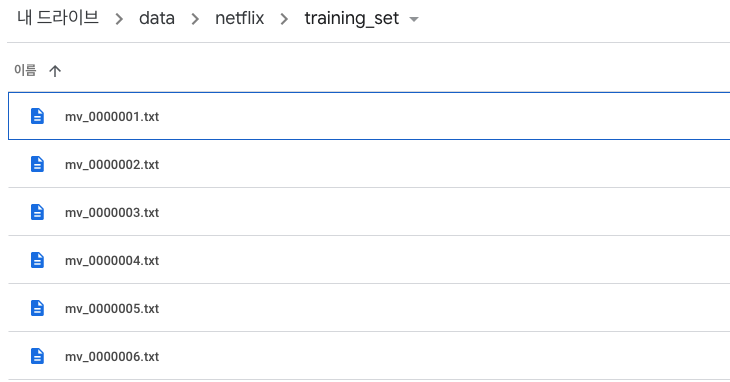

In [ ]:
training_set_path = os.path.join(path, 'training_set')
print(training_set_path)
training_files = os.listdir(training_set_path)

In [ ]:
len(training_files)

In [ ]:
training_files[:10]

In [ ]:
def read_trainfile(filename):
  movieid = int(filename.split('.txt')[0].split('_')[1])
  data_list = []
  with open(os.path.join(training_set_path, filename), 'r') as f:
    for line in f.readlines():
      if ':' in line:
        continue
      else:
        # CustomerID,Rating,Date
        cid = line.split(',')[0]
        rate = line.split(',')[1]
        date = line.split(',')[2].replace('\n', '')
        each_data = (movieid, cid, rate, date)
        data_list.append(each_data)

  df = pd.DataFrame(data = data_list, columns =['movieid','customerID','rating','date'])
  return df

In [ ]:
from tqdm import tqdm
train_df = pd.DataFrame()
for filename in tqdm(training_files[:10]):
  df = read_trainfile(filename)
  if df.shape[1] == 4:
    train_df = pd.concat([train_df, df], axis=0)

In [ ]:
print(train_df.shape)

In [ ]:
train_df.head()

In [ ]:
train_df.groupby('movieid').count()

### Movies File(Titles) 

- encoding값이 `ISO-8859-1`임을 확인한다

In [ ]:
df_title = pd.read_csv(os.path.join(path, 'movie_titles.txt'), encoding = "ISO-8859-1", header = None, names = ['movieid', 'year', 'title'])
df_title.head()

### 기타 파일
1. qualifying.txt
  - 특정 movie id에 평점을 매긴 customerid와 날짜를 적어둔 파일이다
  - qualifying 데이터셋으로 모델의 평점 예측을 기록한다
  ```
  MovieID1:
  CustomerID11,Date11
  CustomerID12,Date12
  ...
  MovieID2:
  CustomerID21,Date21
  CustomerID22,Date22
  ```

2. probe.txt
  - qualifying 데이터셋으로 최종 예측결과를 제출하기 전, 사용해볼 수 있는 테스트 파일이다
  ```
  MovieID1:
  CustomerID11
  CustomerID12
  ...
  MovieID2:
  CustomerID21
  CustomerID22
  ```